In [ ]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

In [ ]:
data=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\ドキュメント\\calories.csv")

In [ ]:
data=data.dropna()

In [ ]:
data=data.drop(columns=['User_ID'])

<Axes: xlabel='Gender'>

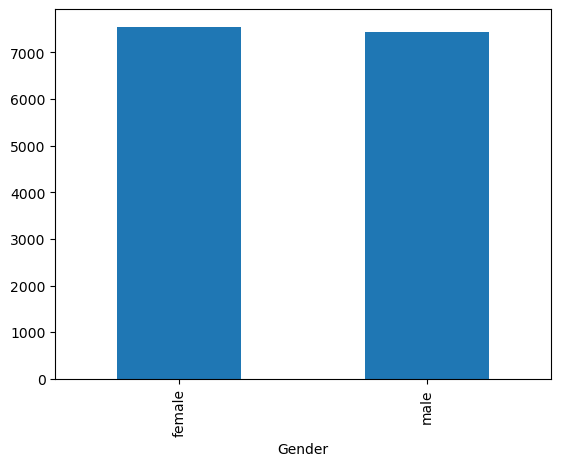

In [ ]:
data['Gender'].value_counts().plot(kind='bar')

In [ ]:
df=data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [ ]:
meter=df['Height']/100
df['Bmi']=df['Weight']/meter**2

In [ ]:
X=df.drop(columns=['Calories'])
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Bmi
0,male,68,190.0,94.0,29.0,105.0,40.8,26.038781
1,female,20,166.0,60.0,14.0,94.0,40.3,21.773842
2,male,69,179.0,79.0,5.0,88.0,38.7,24.655910
3,female,34,179.0,71.0,13.0,100.0,40.5,22.159109
4,female,27,154.0,58.0,10.0,81.0,39.8,24.456063
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,23.087868
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.875115
14997,female,43,159.0,58.0,16.0,90.0,40.1,22.942130
14998,male,78,193.0,97.0,2.0,84.0,38.3,26.040968


In [ ]:
Y=df['Calories']
Y.describe()

count    15000.000000
mean        89.539533
std         62.456978
min          1.000000
25%         35.000000
50%         79.000000
75%        138.000000
max        314.000000
Name: Calories, dtype: float64

In [ ]:
categorical_features=['Gender']
numerical_features=['Age','Height','Weight','Duration','Heart_Rate','Body_Temp','Bmi']


In [ ]:
numeric_transformer=StandardScaler()
categorical_transformer=OneHotEncoder(drop='first')

In [ ]:
preprocessor=ColumnTransformer(transformers=[('num',numeric_transformer,numerical_features),('cat',categorical_transformer,categorical_features)])

In [ ]:
pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)


In [ ]:
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp', 'Bmi']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender'])])),
                ('regressor', LinearRegression())])

In [ ]:
ypred=pipeline.predict(xtest)

In [ ]:
print(f"r2 score:{r2_score(ytest,ypred):.3f}")
print(f"Mean_squared_error:{mean_squared_error(ytest,ypred):.2f}")




r2 score:0.969
Mean_squared_error:125.88


In [ ]:
with open("pickle_files/calorie_model.pkl",'wb') as f:
    pickle.dump(pipeline,f)
    print("model saved succesfullly")


model saved succesfullly
